# Keller - Segel 1 d Ejemplo 2 (Sin fuente de calor)

Consideraremos un esquema implícito para el tiempo, unas diferencias regresivas para $\nabla v$ y una progresiva para el término convectivo

In [46]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [47]:
import math

Consideremos la siguiente ecuación:

$u_t = Du_{xx} - c \nabla \cdot (u v_x)$ para $0\leq x \leq L$ y $0 \leq t \leq T$

$v_t = E v_{xx} - k_1 v + k_2 u$

Con las condiciones de frontera:

$u(0,t)=0$ y $u(L,t)=0$ para $0\leq t \leq T$

Y con la condición inicial:

$u(x,0)=f(x)$ para $0\leq x \leq L$

Ahora cogeremos el número de nodos que tomaremos en cada intervalo. $Nx-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,L]$ y $Nt-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,T]$ (Es decir, si al final tendremos $Nt+1$ puntos contando los de los extremos en cada intervalo). 

A continuación, $a$ indica $\alpha$. Para comenzar de forma sencilla vamos a considerar $\alpha=1$.

In [48]:
from numpy import linspace, array

In [49]:
import ipywidgets

In [50]:
def implicit_1d(n, D2,k, h, k1, k2, v1, u1):
    v=zeros(n+1)
    r = D2*k/(h**2)
    s1 = k*k1
    s2 = k*k2
    for i in range(1,n-1):
        v[i]=r*v1[i+1]+(1-2*r-s1)*v1[i]+r*v1[i-1]+s2*u1[i]
    v[0]=v[1]
    v[n]=v[n-1]
    return v

In [51]:
def reg_prog_1d(n, m, D1, c, k, h, u1, v1):
    u=zeros(n+1)
    p1 = D1*k/(4*h**2)
    p2 = c*k/(h**2)
    for i in range(1, n-1):
        u[i]= u1[i]-p1*(3*(v1[i+1]-v1[i-1])*u1[i]-4*(v1[i]-v1[i-2])*u1[i-1] + (v1[i-1]-v1[i-3])*u1[i-2])+p2*(u1[i+1]-2*u1[i]+u1[i-1])
    u[0]=u[1]
    u[n]=u[n-1]
    return u    

In [60]:
def ks_progres_1d(a, b, T1, T2, n, m, D1, D2, k1, k2, c):
    x = linspace(a, b, n+1)
    h = x[1] - x[0]
    t = linspace(T1, T2, m+1)
    k = t[1] - t[0]
    def u0(x):return 840*exp(-84*x**2) # Cambiar función
    def v0(x): return 420*exp(-42*x**2)
    v=zeros(n+1)
    v1=zeros(n+1)
    u=zeros(n+1)
    u1=zeros(n+1)

    v1= v0(x)
    u1=u0(x)

    #for i in range(0, n+1):
    #    v1[i]=v0(x[i])

    #for i in range(0, n+1):
    #    u1[i]=u0(x[i])

    listu=[u1]
    listv=[v1]

    for j in range(0, m-1):
        v = implicit_1d(n, D2,k, h, k1, k2, v1, u1)
        listv.extend([v])
        u = reg_prog_1d(n, m, D1, c, k, h, u1, v1)
        listu.extend([u])
        u1=u
        v1=v
        u=zeros(n+1)
        v=zeros(n+1)
    return x, t, listu, listv

In [65]:
x_h, t_h, lista_u, lista_v = ks_progres_1d(-1/2,1/2,0,1,51,10404,1,1,1,1,1)

C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [66]:
t_h

array([  0.00000000e+00,   9.61168781e-05,   1.92233756e-04, ...,
         9.99807766e-01,   9.99903883e-01,   1.00000000e+00])

In [74]:
t_h[2]

0.00019223375624759708

In [56]:
x_h

array([-0.5       , -0.48039216, -0.46078431, -0.44117647, -0.42156863,
       -0.40196078, -0.38235294, -0.3627451 , -0.34313725, -0.32352941,
       -0.30392157, -0.28431373, -0.26470588, -0.24509804, -0.2254902 ,
       -0.20588235, -0.18627451, -0.16666667, -0.14705882, -0.12745098,
       -0.10784314, -0.08823529, -0.06862745, -0.04901961, -0.02941176,
       -0.00980392,  0.00980392,  0.02941176,  0.04901961,  0.06862745,
        0.08823529,  0.10784314,  0.12745098,  0.14705882,  0.16666667,
        0.18627451,  0.20588235,  0.2254902 ,  0.24509804,  0.26470588,
        0.28431373,  0.30392157,  0.32352941,  0.34313725,  0.3627451 ,
        0.38235294,  0.40196078,  0.42156863,  0.44117647,  0.46078431,
        0.48039216,  0.5       ])

In [57]:
from matplotlib.pylab import plot, show, grid, legend

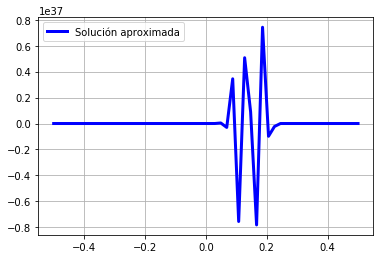

In [82]:
plot(x_h, lista_u[10],"-", label = "Solución aproximada", linewidth=3, color="blue")
#plot(x_h,lista_u[9],"o",c="r",label="nodos")
grid()
legend()
show()

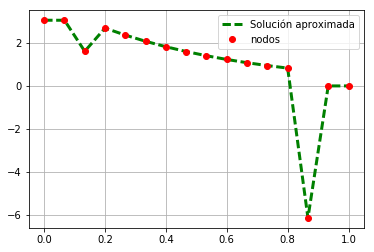

In [16]:
plot(x_h, lista_v[2],"--", label = "Solución aproximada", linewidth=3, color="green")
plot(x_h,lista_v[2],"o",c="r",label="nodos")
grid()
legend()
show()

In [84]:
def f(x, t): return exp(-2*t)*cos(2*x)

In [85]:
f(1,2)

-0.0076219951828865474

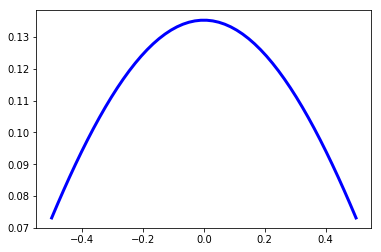

In [86]:
plot(x_h, f(x_h, 1),"-", label = "Solución aproximada", linewidth=3, color="blue")